In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [84]:
star_wars.head(2)

,RespondentID,Do you consider yourself to be a fan of the Star Wars film franchise?,1_seen,2_seen,3_seen,4_seen,5_seen,6_seen,ranking_1,ranking_2,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,3.0,2.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,None,False,False,False,False,False,False,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].apply(lambda x: True if x == 'Yes' else False if x == 'No' else None)

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].apply(lambda x: True if x == 'Yes' else False if x == 'No' else None)

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique()

array([ True, False])

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique()

array([True, None, False], dtype=object)

In [8]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']

0       Star Wars: Episode I  The Phantom Menace
1                                            NaN
2       Star Wars: Episode I  The Phantom Menace
3       Star Wars: Episode I  The Phantom Menace
4       Star Wars: Episode I  The Phantom Menace
                          ...                   
1181    Star Wars: Episode I  The Phantom Menace
1182    Star Wars: Episode I  The Phantom Menace
1183                                         NaN
1184    Star Wars: Episode I  The Phantom Menace
1185    Star Wars: Episode I  The Phantom Menace
Name: Which of the following Star Wars films have you seen? Please select all that apply., Length: 1186, dtype: object

In [9]:
import numpy as np
unique_values = pd.unique(star_wars[star_wars.columns[3:9]].values.ravel())
unique_values = unique_values[0:6]

In [10]:
star_survey_dict = {}
seen = [1, 2 , 3, 4, 5, 6]
for value1, value2 in zip(unique_values, seen):
    if value1 not in star_survey_dict:
        star_survey_dict[f'{value2}_seen'] = value1

col_lst = star_wars.columns[3:9]

In [13]:
for col, key, header in zip(star_wars.columns[3:9], star_survey_dict.keys(), col_lst):
    star_wars[col] = star_wars[col].apply(lambda x: True if x == star_survey_dict[key] else False)

In [24]:
new_names = star_survey_dict.keys()
star_wars.columns[3:9]
mapped = {}

for key, value in zip(new_names, star_wars.columns[3:9]):
    mapped[value] = key

In [25]:
mapped

{'Which of the following Star Wars films have you seen? Please select all that apply.': '1_seen',
 'Unnamed: 4': '2_seen',
 'Unnamed: 5': '3_seen',
 'Unnamed: 6': '4_seen',
 'Unnamed: 7': '5_seen',
 'Unnamed: 8': '6_seen'}

In [39]:
star_wars.rename(columns={old_name: new_name for old_name, new_name in zip(star_wars.columns[3:9], star_wars.columns[3:9].map(mapped))}, inplace=True)

In [42]:
star_wars[star_wars.columns[3:9]]

,1_seen,2_seen,3_seen,4_seen,5_seen,6_seen
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [43]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [51]:
star_wars.columns[9:15].to_list()

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14']

In [54]:
new_cols = []
for i in range(1,7):
    new_cols.append(f'ranking_{i}')
old_cols = star_wars.columns[9:15].to_list()
len(new_cols) == len(old_cols)

True

In [57]:
mapped = {}
for new, old in zip(new_cols, old_cols):
    if old not in mapped:
        mapped[old] = new
mapped

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [58]:
star_wars.rename(columns={old_name: new_name for old_name, new_name in zip(star_wars.columns[9:15], star_wars.columns[9:15].map(mapped))}, inplace=True)


In [59]:
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


In [62]:
rank_cols = star_wars.columns[star_wars.columns.str.contains(r'ranking')].to_list()

In [64]:
rank_mean_dict = {}
for col in rank_cols:
    if col not in rank_mean_dict:
        rank_mean_dict[col] = star_wars[col].mean()

In [65]:
rank_mean_dict

{'ranking_1': np.float64(3.7329341317365268),
 'ranking_2': np.float64(4.087320574162679),
 'ranking_3': np.float64(4.341317365269461),
 'ranking_4': np.float64(3.272727272727273),
 'ranking_5': np.float64(2.513157894736842),
 'ranking_6': np.float64(3.047846889952153)}

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

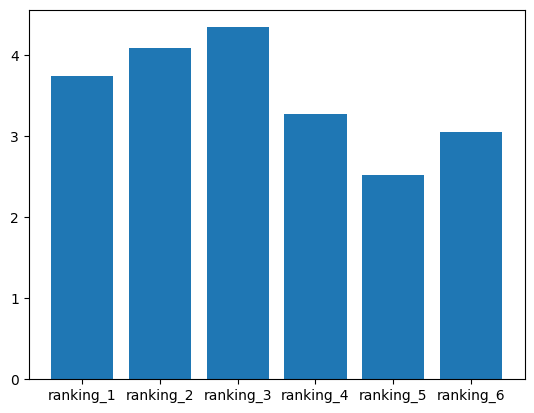

In [67]:
plt.bar(rank_mean_dict.keys(),rank_mean_dict.values())
plt.show()

In [71]:
rank_values = ['Star Wars: Episode I The Phantom Menace',
           'Star Wars: Episode II Attack of the Clones',
           'Star Wars: Episode III Revenge of the Sith',
           'Star Wars: Episode IV A New Hope',
           'Star Wars: Episode V The Empire Strikes Back',
           'Star Wars: Episode VI Return of the Jedi']
rank_key = new_cols
rank_dict = {}

for key, value in zip(rank_key, rank_values):
    if key not in rank_dict:
        rank_dict[key] = value

In [72]:
rank_dict

{'ranking_1': 'Star Wars: Episode I The Phantom Menace',
 'ranking_2': 'Star Wars: Episode II Attack of the Clones',
 'ranking_3': 'Star Wars: Episode III Revenge of the Sith',
 'ranking_4': 'Star Wars: Episode IV A New Hope',
 'ranking_5': 'Star Wars: Episode V The Empire Strikes Back',
 'ranking_6': 'Star Wars: Episode VI Return of the Jedi'}

In [73]:
# It looks like the highest ranked movies are the first three

In [78]:
star_wars = star_wars.drop(columns='Have you seen any of the 6 films in the Star Wars franchise?')

In [79]:
seen_cols = star_wars.columns[star_wars.columns.str.contains(r'seen')].to_list()
seen_cols

['1_seen', '2_seen', '3_seen', '4_seen', '5_seen', '6_seen']

In [80]:
seen_sum_dict = {}
for col in seen_cols:
    if col not in seen_sum_dict:
        seen_sum_dict[col] = star_wars[col].sum()

In [81]:
seen_sum_dict

{'1_seen': np.int64(673),
 '2_seen': np.int64(571),
 '3_seen': np.int64(550),
 '4_seen': np.int64(607),
 '5_seen': np.int64(758),
 '6_seen': np.int64(738)}

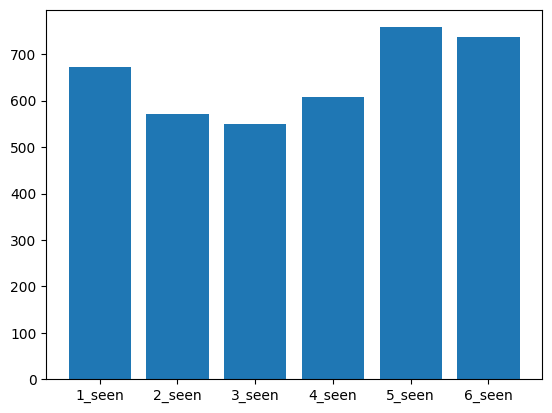

In [82]:
plt.bar(seen_sum_dict.keys(),seen_sum_dict.values())
plt.show()

In [89]:
seen_values = rank_values
seen_key = seen_sum_dict.keys()
seen_dict = {}

for key, value in zip(seen_key, seen_values):
    if key not in seen_dict:
        seen_dict[key] = value
seen_dict

{'1_seen': 'Star Wars: Episode I The Phantom Menace',
 '2_seen': 'Star Wars: Episode II Attack of the Clones',
 '3_seen': 'Star Wars: Episode III Revenge of the Sith',
 '4_seen': 'Star Wars: Episode IV A New Hope',
 '5_seen': 'Star Wars: Episode V The Empire Strikes Back',
 '6_seen': 'Star Wars: Episode VI Return of the Jedi'}

In [93]:
# More people have seen the older movies

In [112]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

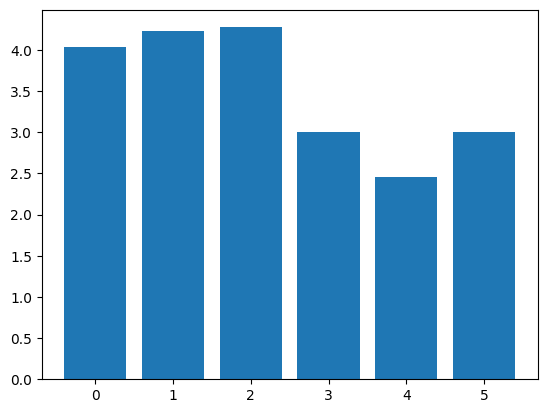

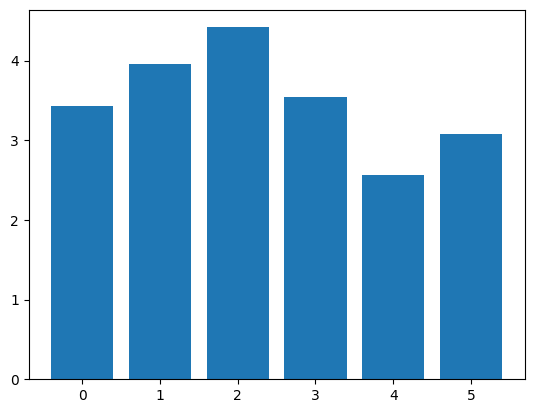

In [129]:
plt.bar(range(6), males[rank_cols].mean())
plt.show()

plt.bar(range(6), females[rank_cols].mean())
plt.show()

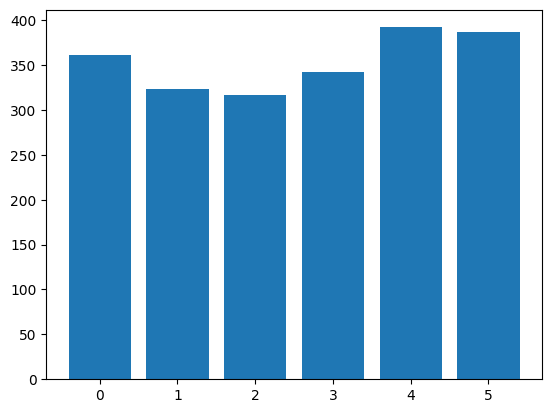

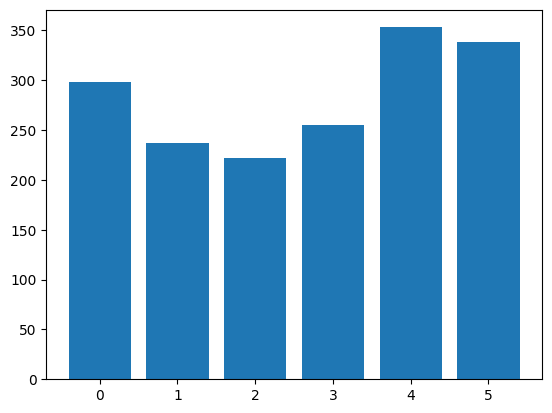

In [128]:
plt.bar(range(6), males[seen_cols].sum())
plt.show()

plt.bar(range(6), females[seen_cols].sum())
plt.show()
